In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

# simpleitk
import SimpleITK as sitk
import os
import cv2
import scipy.interpolate as spi


In [24]:
patient_4d = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training/patient005/patient005_4d.nii.gz"
saved_folder = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5"
patient_4d_img = sitk.ReadImage(patient_4d)
current_spacing = np.array(patient_4d_img.GetSpacing())
print("spacing: ", spacing)
patient_4d_arr = sitk.GetArrayFromImage(patient_4d_img)
print("patient_4d_arr.shape: ", patient_4d_arr.shape)
# extract each frame at slice 4


spacing:  [ 1.40625  1.40625 10.       1.     ]
patient_4d_arr.shape:  (30, 10, 216, 256)


In [34]:
target_resolution = np.array([1.0, 1.0, 1.0])
resize_factor = np.array([current_spacing[0] / target_resolution[0], 
                                current_spacing[1] / target_resolution[1]])

new_real_shape = np.array(patient_4d_img[0][0].GetSize()) * resize_factor

new_shape = np.round(new_real_shape).astype(int)
print("new_shape: ", new_shape)
real_resize_factor = new_shape / np.array(patient_4d_img[0][0].GetSize())
print("real_resize_factor: ", real_resize_factor)

new_shape:  [14 42]
real_resize_factor:  [1.4 1.4]


image.shape:  (216, 256)
image.min():  0
image.max():  255


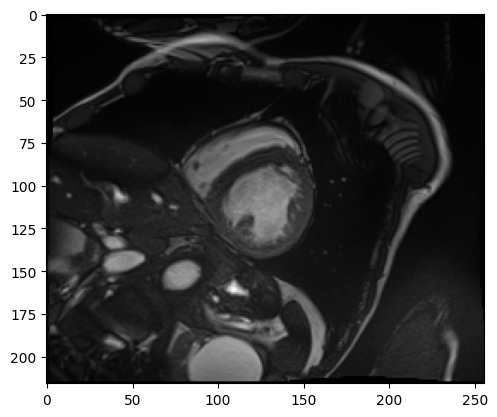

In [20]:
image = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_29.npy")
print("image.shape: ", image.shape)
# Normalize the image
print("image.min(): ", image.min())
print("image.max(): ", image.max())
plt.imshow(image, cmap='gray')


In [30]:
def monotonic_zoom_interpolate( img: np.ndarray, zoom_factor: float) -> np.ndarray:
    """
    Apply monotonic zoom interpolation to a given image.
    """        
    result = img.copy()
    print("result.shape: ", result.shape)
    for axis, factor in enumerate(zoom_factor[::-1]):
        new_length = int(result.shape[axis] * factor)
        x_old = np.arange(result.shape[axis])
        x_new = np.linspace(0, result.shape[axis] - 1, new_length)
        
        # Perform monotonic interpolation
        pchip_interp = spi.PchipInterpolator(x_old, result.take(indices=x_old, axis=axis), axis=axis)
        result = pchip_interp(x_new)
    return result


In [35]:
images_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5"
images = os.listdir(images_path)
for image in images:
    name = image
    image = np.load(os.path.join(images_path, name))
    result = monotonic_zoom_interpolate(image, real_resize_factor)
    # Save the result
    result_path = os.path.join(images_path, name)
    np.save(result_path, result)
    print(f"Saved interpolated image to {result_path}")

result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_11.npy
result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_10.npy
result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_12.npy
result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_8.npy
result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_9.npy
result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_13.npy
result.shape:  (216, 256)
Saved interpolated image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/

In [45]:
# pad the image to 512*512 at the center
def pad_image(image, target_shape):
    """
    Pad the image to the target shape at the center.
    """
    # Calculate padding sizes
    pad_width = [(0, 0)] * image.ndim
    for dim in range(image.ndim):
        total_pad = target_shape[dim] - image.shape[dim]
        pad_width[dim] = (total_pad // 2, total_pad - total_pad // 2)
    
    # Pad the image
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    return padded_image






In [46]:
images_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5"
images = os.listdir(images_path)
for image in images:
    name = image
    image = np.load(os.path.join(images_path, name))
    # Pad the image to 512x512
    padded_image = pad_image(image, (512, 512))
    # Save the padded image
    result_path = os.path.join(images_path, name)
    np.save(result_path, padded_image)
    print(f"Saved padded image to {result_path}")

Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_11.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_10.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_12.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_8.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_9.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_13.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_17.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_16.npy
Saved padded image to /Users/ahmed_ali/Documents/GitHub/GP-2025-St

In [48]:
from scipy.ndimage import center_of_mass

(-0.5, 511.5, 511.5, -0.5)

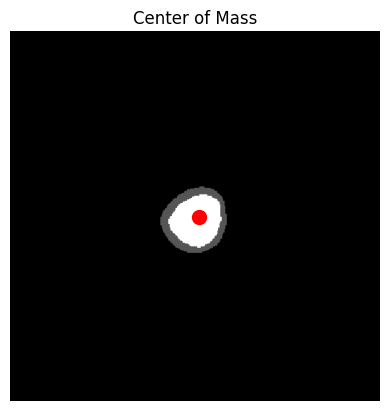

In [52]:
mask = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/patient005/patient005_frame01_slice_3_ACDC.npy")
mask = mask[1]
mask[mask == 1] = 0
mask[mask == 2] = 1
com = center_of_mass(mask)
plt.scatter(com[0], com[1], color='red', s=100, label='Center of Mass')
plt.imshow(mask, cmap='gray')
plt.title("Center of Mass")
plt.axis('off')

In [53]:
def crop_image( image, center_mass, size = 128):
        cropx, cropy = size, size   # size of the cropped image
        y, x = center_mass
        startx = int(x - cropx // 2)
        starty = int(y - cropy // 2)
        return image[starty:starty + cropy, startx:startx + cropx]

In [55]:
images_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5"
images = os.listdir(images_path)
for image in images:
    name = image
    image = np.load(os.path.join(images_path, name))
    cropped_image = crop_image(image, com, size=128)
    # Save the cropped image
    result_path = os.path.join(images_path, name)
    np.save(result_path, cropped_image)
    print(f"Saved cropped image to {result_path}")
    

Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_11.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_10.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_12.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_8.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_9.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_13.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_17.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5/patient_4d_frame_16.npy
Saved cropped image to /Users/ahmed_ali/Documents/GitHub/G

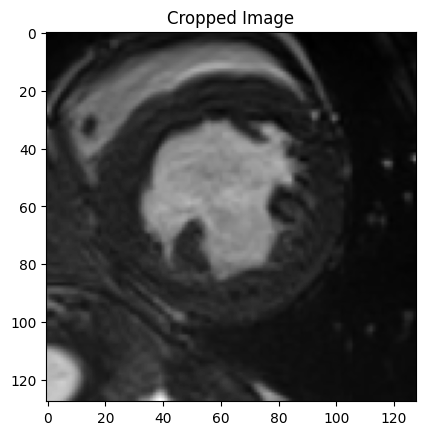

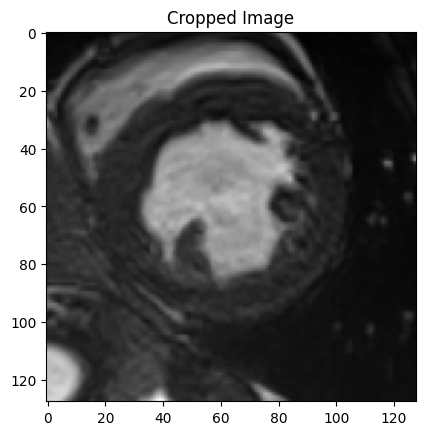

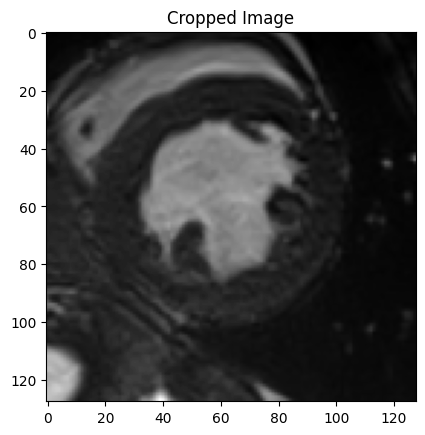

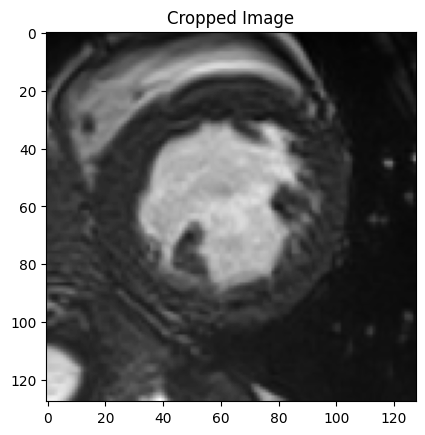

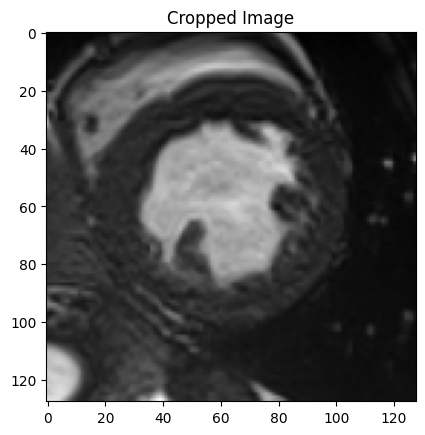

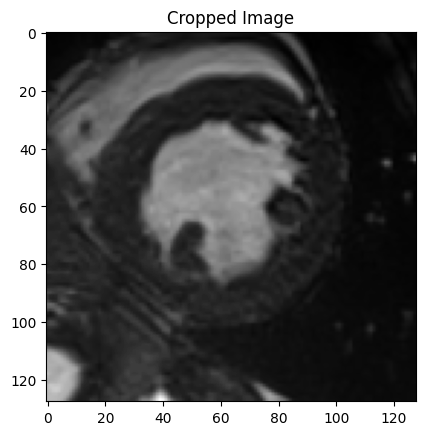

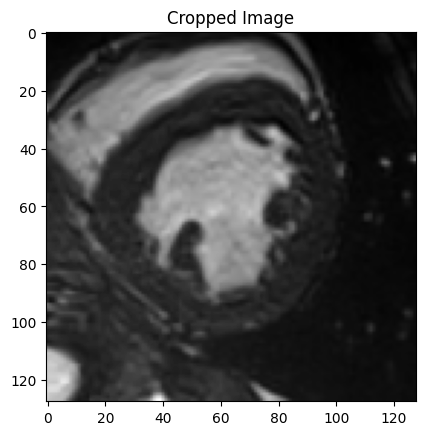

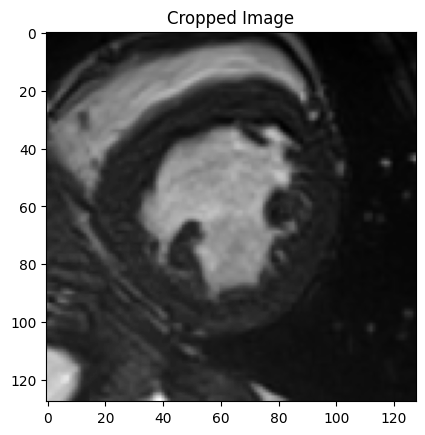

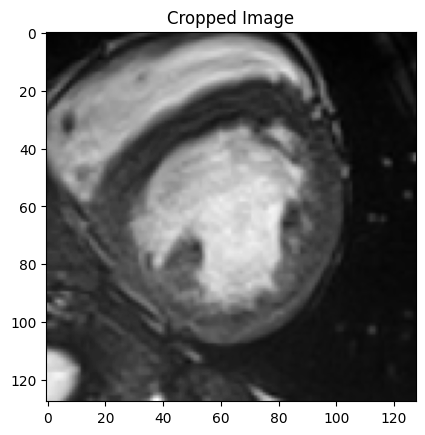

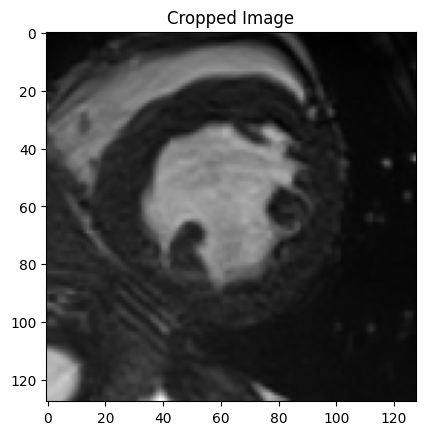

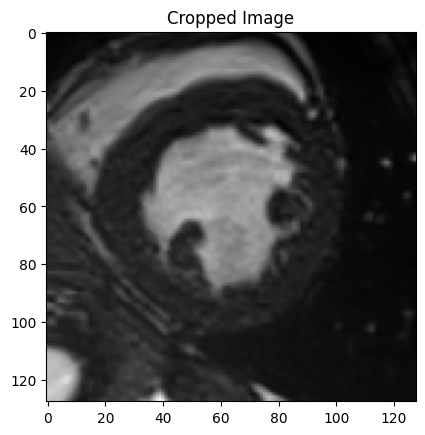

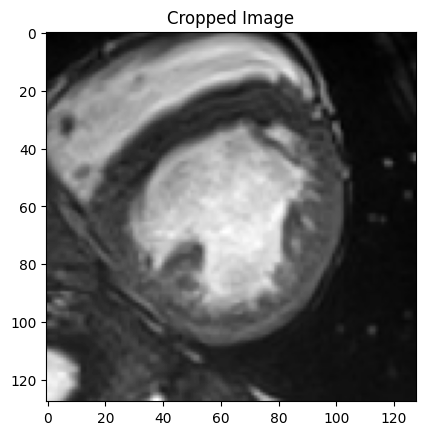

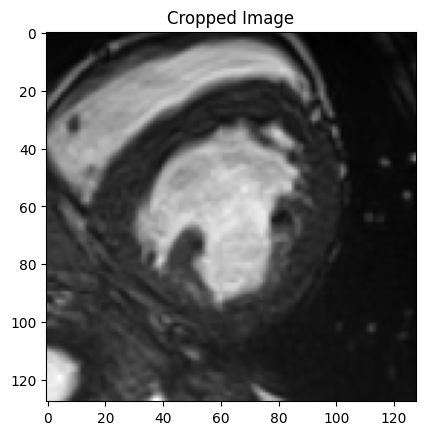

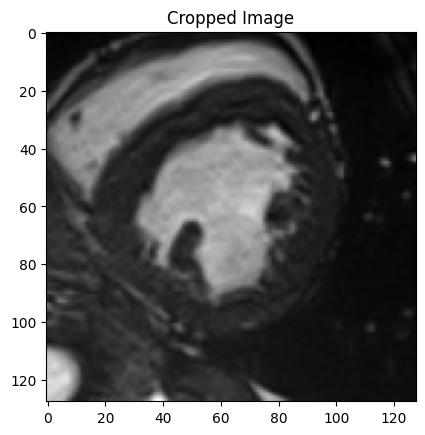

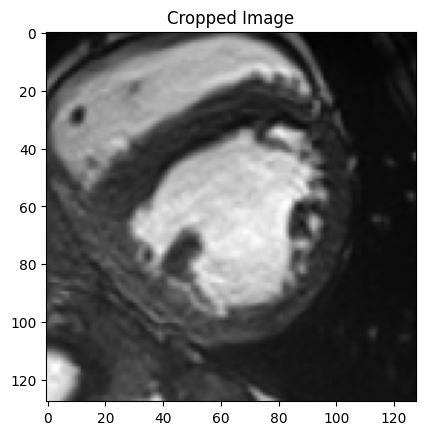

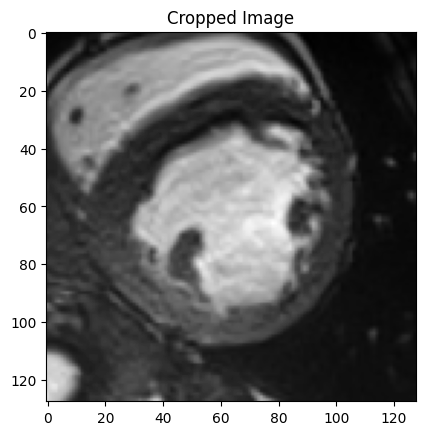

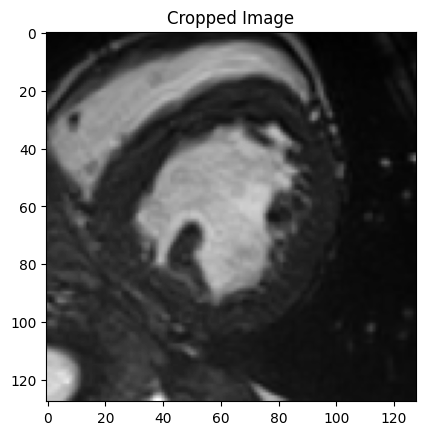

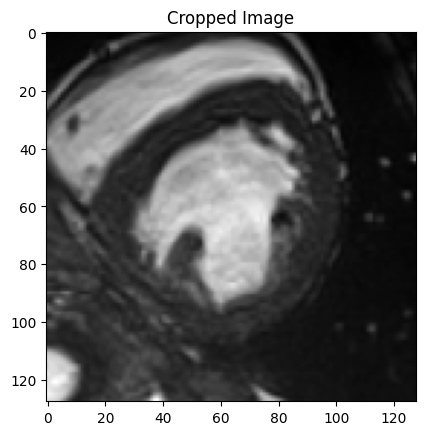

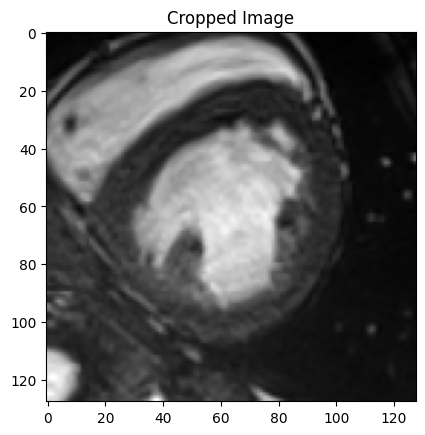

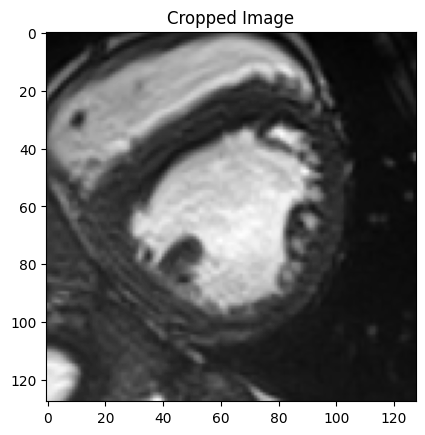

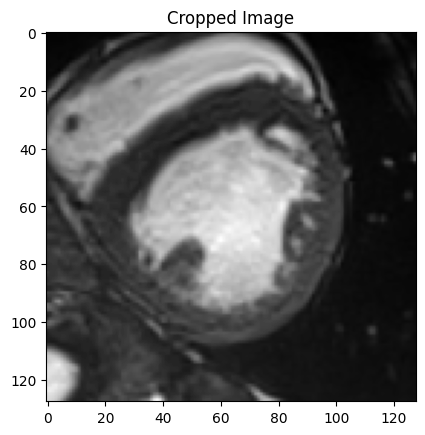

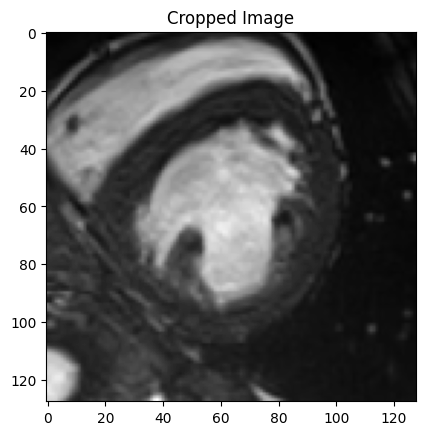

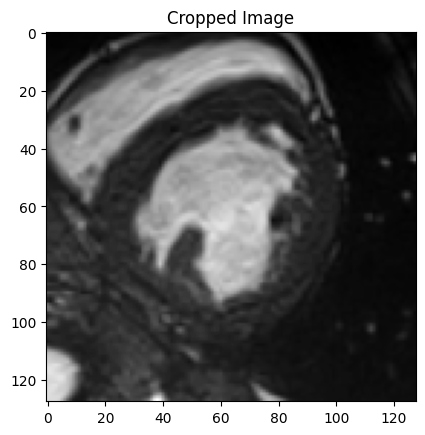

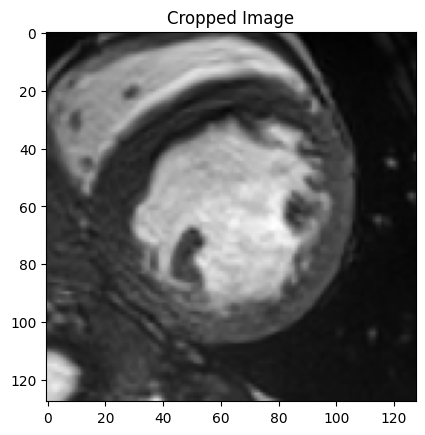

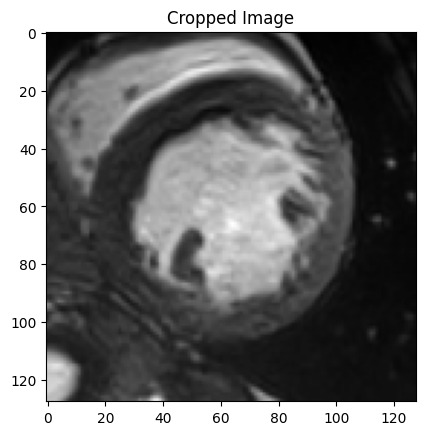

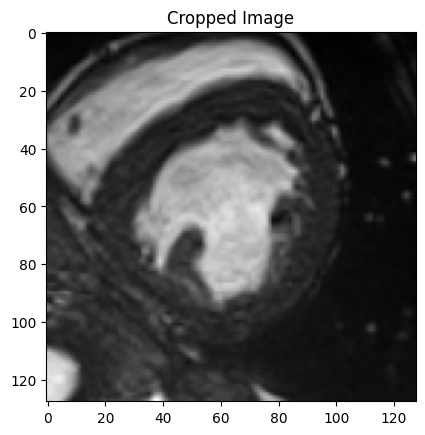

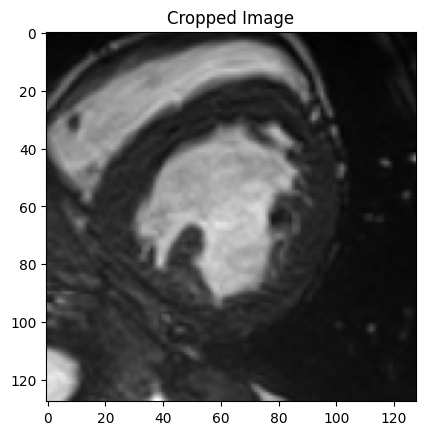

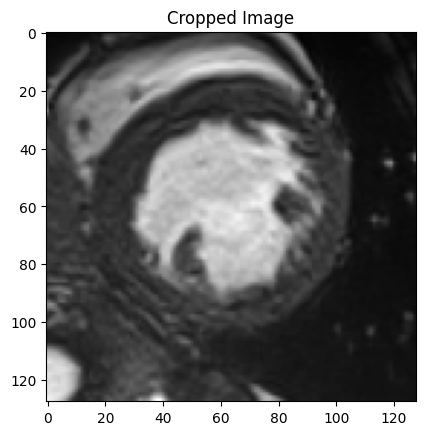

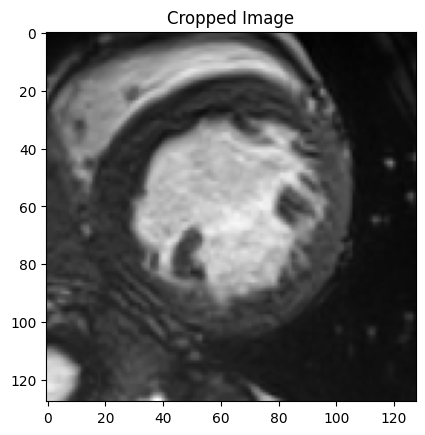

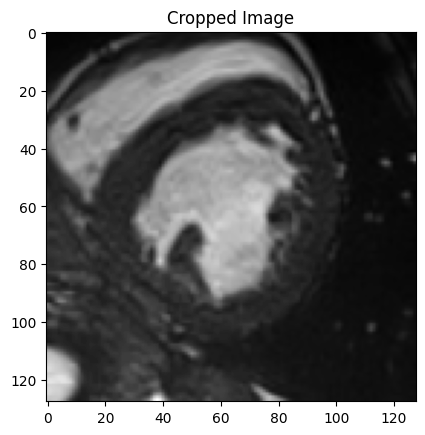

In [57]:
images_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5"
images = os.listdir(images_path)
for image in images:
    name = image
    image = np.load(os.path.join(images_path, name))
    plt.imshow(image, cmap='gray')
    plt.title("Cropped Image")
    plt.show()

In [63]:
# plt the images as a movie matplotlib animation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib import cm
import re
from matplotlib.colors import Normalize 

def create_animation(images_path, output_path, fps=10):
    images = os.listdir(images_path)
    images.sort(key=lambda x: int(re.search(r'frame_(\d+)', x).group(1)))
    print("images: ", images)
    fig, ax = plt.subplots()
    ims = []
    
    for image in images:
        img = np.load(os.path.join(images_path, image))
        img = np.squeeze(img)  # Remove single-dimensional entries
        img = np.clip(img, 0, 255).astype(np.uint8)  # Ensure the image is in uint8 format
        im = ax.imshow(img, animated=True, cmap='gray')
        ims.append([im])
    
    ani = animation.ArtistAnimation(fig, ims, interval=1000/fps, blit=True)
    ani.save(output_path, writer='ffmpeg', fps=fps)
    plt.close(fig)

# Example usage
images_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5"
output_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/Archive/patient5_animation.mp4"
create_animation(images_path, output_path, fps=10)

images:  ['patient_4d_frame_0.npy', 'patient_4d_frame_1.npy', 'patient_4d_frame_2.npy', 'patient_4d_frame_3.npy', 'patient_4d_frame_4.npy', 'patient_4d_frame_5.npy', 'patient_4d_frame_6.npy', 'patient_4d_frame_7.npy', 'patient_4d_frame_8.npy', 'patient_4d_frame_9.npy', 'patient_4d_frame_10.npy', 'patient_4d_frame_11.npy', 'patient_4d_frame_12.npy', 'patient_4d_frame_13.npy', 'patient_4d_frame_14.npy', 'patient_4d_frame_15.npy', 'patient_4d_frame_16.npy', 'patient_4d_frame_17.npy', 'patient_4d_frame_18.npy', 'patient_4d_frame_19.npy', 'patient_4d_frame_20.npy', 'patient_4d_frame_21.npy', 'patient_4d_frame_22.npy', 'patient_4d_frame_23.npy', 'patient_4d_frame_24.npy', 'patient_4d_frame_25.npy', 'patient_4d_frame_26.npy', 'patient_4d_frame_27.npy', 'patient_4d_frame_28.npy', 'patient_4d_frame_29.npy']
